In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from figure_formatting import figure_formatting as ff
ff.formatting['axes.linewidth'] = 0.5
ff.formatting['lines.linewidth'] = 1.0
ff.set_formatting()
ff.set_formatting()

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from typing import Optional


In [2]:
colors = {'blue': '#264653',
          'green': '#2A9D8F',
          'yellow': '#E9C46A',
          'light orange': '#F4A261',
          'dark orange': '#E76F51'}

In [3]:
column_names = ('ppm', 'spectrum', 'model', 'line1', 'line2', 'line3')
nmr_data = pd.read_csv('../Data/blc spec and model all lines.ppm', 
                       skiprows=3,
                       delim_whitespace=True,
                       names=column_names)

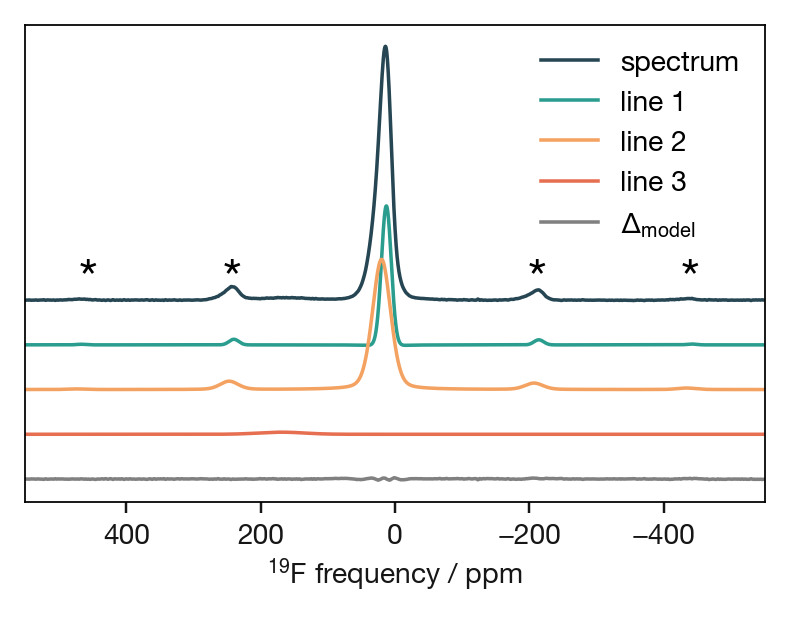

In [4]:
fig = plt.figure(figsize=(3.15,2.5))

y_offset = 50
fs = 20
resonance_label_locs = ((470, 55),
                        (257, 55),
                        (-197, 55),
                        (-425, 55))

plt.plot(nmr_data.ppm, nmr_data.spectrum+y_offset, label='spectrum', color=colors['blue'])
plt.plot(nmr_data.ppm, nmr_data.line1, label='line 1', alpha=1, color=colors['green'])
plt.plot(nmr_data.ppm, nmr_data.line2-y_offset, label='line 2', alpha=1, color=colors['light orange'])
plt.plot(nmr_data.ppm, nmr_data.line3-y_offset*2, label='line 3', alpha=1, color=colors['dark orange'])
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

for l in resonance_label_locs:
    plt.text(*l,'*', fontsize=15)

plt.plot(nmr_data.ppm, 
         nmr_data.model - nmr_data.spectrum - y_offset*3,
         label=r'$\Delta_\mathrm{model}$', color='grey')
plt.xlim((550,-550))
plt.xlabel(r'$^{19}$F frequency / ppm')
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('../Figures/19F nmr.pdf')
plt.show()

In [5]:
column_names = ('ppm sim', 'spectrum sim', 'ppm expt', 'spectrum')
sim_nmr_data = pd.read_csv('../Data/spectres 19F exp & calc config 4 FO DFT-D3.csv',
                       skiprows=1,
                       delim_whitespace=False,
                       names=column_names)

In [6]:
def plot_NMR_figure(ppm_exp: np.ndarray,
                    data_exp: np.ndarray,
                    ppm_sim: np.ndarray,
                    data_sim: np.ndarray,
                    title: Optional[str]=None,
                    savefig: Optional[str]=None) -> None:

    data_exp -= data_exp.min()
    data_sim -= data_sim.min()
    data_sim *= data_exp.max() / data_sim.max()
    
#     print(data_sim.min(), data_sim.max(), data_exp.min(), data_exp.max())
    
    fig, ax = plt.subplots(figsize=(3.15,2.5))
    axins = ax.inset_axes([0,0.46,0.35,0.5])

    ax.plot(ppm_exp, data_exp, label='experiment', color=colors['blue'])
    ax.plot(ppm_sim, data_sim, label='simulated', color=colors['green'], linestyle='--')

    axins.plot(ppm_exp, data_exp, label='experiment', color=colors['blue'])
    axins.plot(ppm_sim, data_sim, label='simulated', color=colors['green'], linestyle='--')

    axins.set_xlim((100, -50))
    axins.set_xticks([100, 50, 0, -50])
    ax.set_xlim((400,-400))
    ax.set_xlabel(r'$^{19}$F frequency / ppm')
    axins.set_xlabel(r'$^{19}$F frequency / ppm')
    ax.legend(frameon=False, loc='upper right', handlelength=2.5)
    ax.spines[['right', 'top', 'left']].set_visible(False)
    ax.get_yaxis().set_visible(False)
    axins.get_yaxis().set_visible(False)
    axins.spines[['right', 'top', 'left']].set_visible(False)
    if title:
        plt.title(title)
    plt.tight_layout()
    if savefig:
        plt.savefig(savefig)
    plt.show()

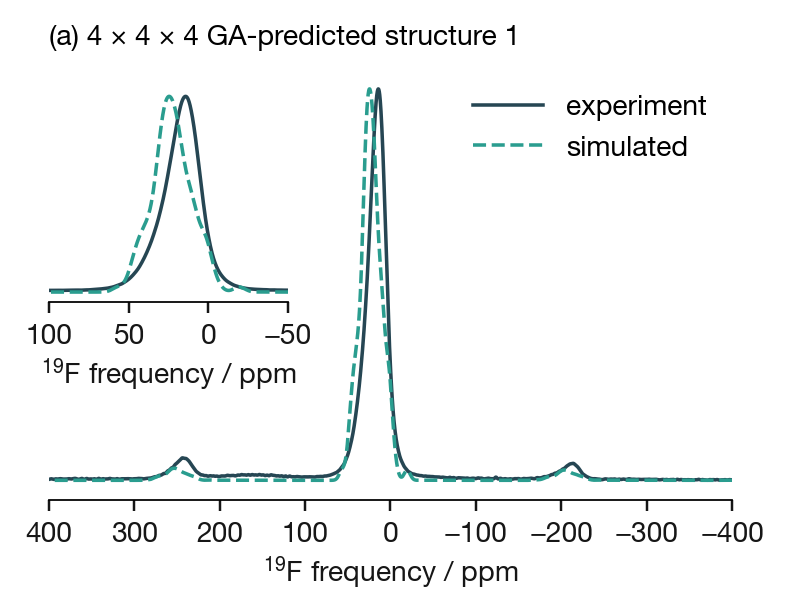

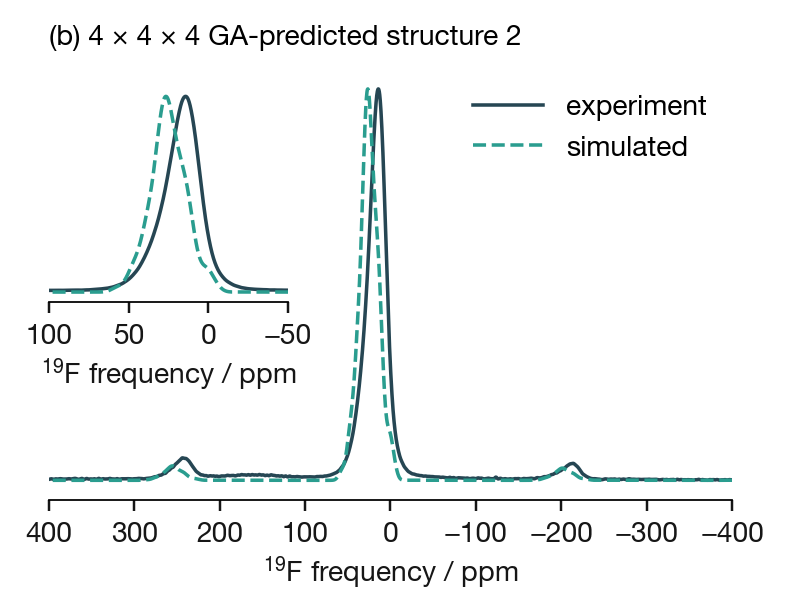

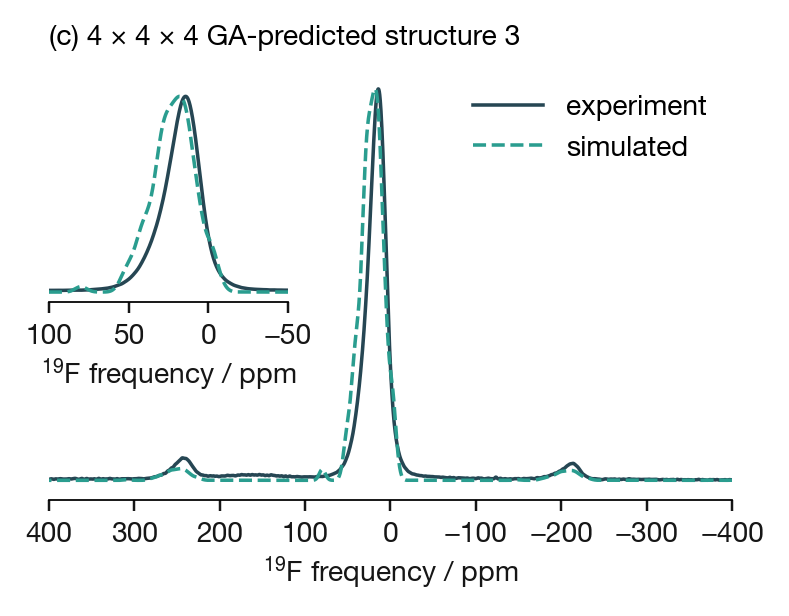

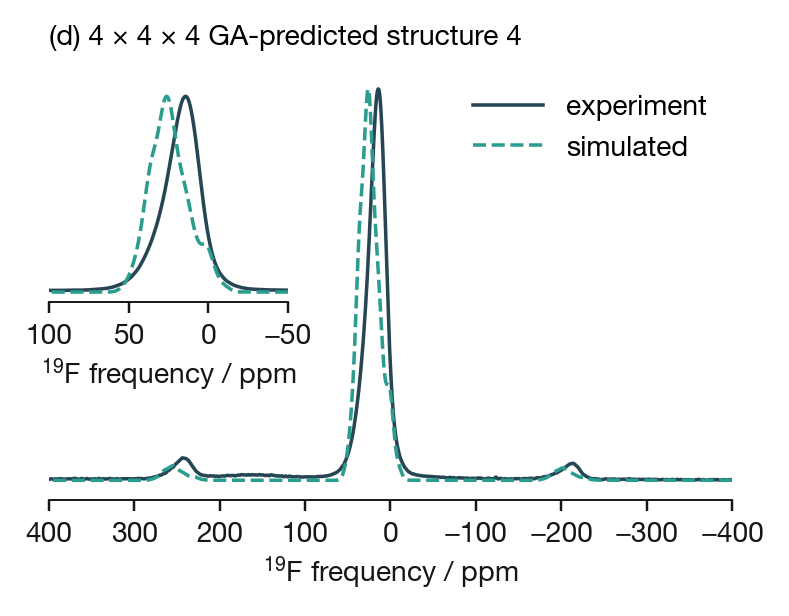

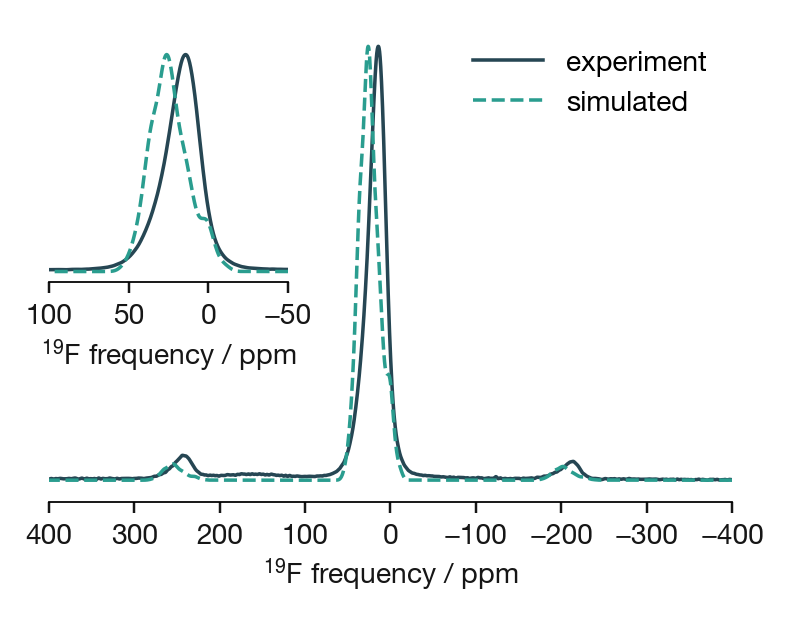

In [8]:
df = pd.read_excel(io='../Data/19F config 1 2 3 4 2024.xlsx' ,sheet_name="spectra")

panels = ['(a)', '(b)', '(c)', '(d)']

for i in range(1, 5):
    plot_NMR_figure(ppm_exp=df['19F shift.1'],
                    data_exp=df['exp'],
                    ppm_sim=df['19F shift'],
                    data_sim=df[f'config {i}.1'],
                    savefig=f'../Figures/19F_nmr_sim_config_{i}.pdf',
                    title=f'{panels[i-1]} 4 × 4 × 4 GA-predicted structure {i}')
    
plot_NMR_figure(ppm_exp=df['19F shift.1'],
                    data_exp=df['exp'],
                    ppm_sim=df['19F shift'],
                    data_sim=df[f'config {i}.1'],
                    savefig=f'../Figures/19F_nmr_sim.pdf',
                    title=None)